In [1]:
from datatypes.virtualCamera import VirtualCamera
import numpy as np
import matplotlib.pyplot as plt

In [2]:
focal_length = 50*10**-3
image_bounds = (3600, 2400) # Pixels (x,y)
film_size = (36*10**-3, 24*10**-3)
px = film_size[0]/image_bounds[0]
py = film_size[1]/image_bounds[1]
principal_point = (image_bounds[0]/2,image_bounds[1]/2)
width_of_sensor = 36*10**-3 # Width of sensor

camera = VirtualCamera(focal_length, px, py, principal_point, image_bounds)


In [17]:
world_center = np.array([0, 0, 0])
image_centerpoint = np.array([200, 0, 0])
rot_angle = np.pi/40
translational_movement = 0.2
camera.place_camera_in_world(world_center, 0, 0, 0)
projected_point = camera.project_point(image_centerpoint)

camera.place_camera_in_world(world_center, rot_angle, 0, 0)
projected_point_roll = camera.project_point(image_centerpoint)

camera.place_camera_in_world(world_center, 0, rot_angle, 0)
projected_point_pitch = camera.project_point(image_centerpoint)

camera.place_camera_in_world(world_center, 0, 0, rot_angle)
projected_point_yaw = camera.project_point(image_centerpoint)

camera.place_camera_in_world(np.array([translational_movement, 0, 0]), 0, 0, 0)
projected_point_w1 = camera.project_point(image_centerpoint)

camera.place_camera_in_world(np.array([0, translational_movement, 0]), 0, 0, 0)
projected_point_w2 = camera.project_point(image_centerpoint)

camera.place_camera_in_world(np.array([0, 0, translational_movement]), 0, 0, 0)
projected_point_w3 = camera.project_point(image_centerpoint)

#points = [projected_point, projected_point_roll, projected_point_pitch, projected_point_yaw, projected_point_x, projected_point_y, projected_point_z]
center_point = projected_point
print(center_point.image_coordinate)
rotation_points = [projected_point_roll.image_coordinate, projected_point_pitch.image_coordinate, projected_point_yaw.image_coordinate] 
print(rotation_points)
translation_points = [projected_point_w1.image_coordinate, projected_point_w2.image_coordinate, projected_point_w3.image_coordinate]
print(translation_points)


[1800. 1200.]
[array([1800., 1200.]), array([1800.        ,  806.48798299]), array([2193.51201701, 1200.        ])]
[array([1800., 1200.]), array([1805., 1200.]), array([1800., 1205.])]


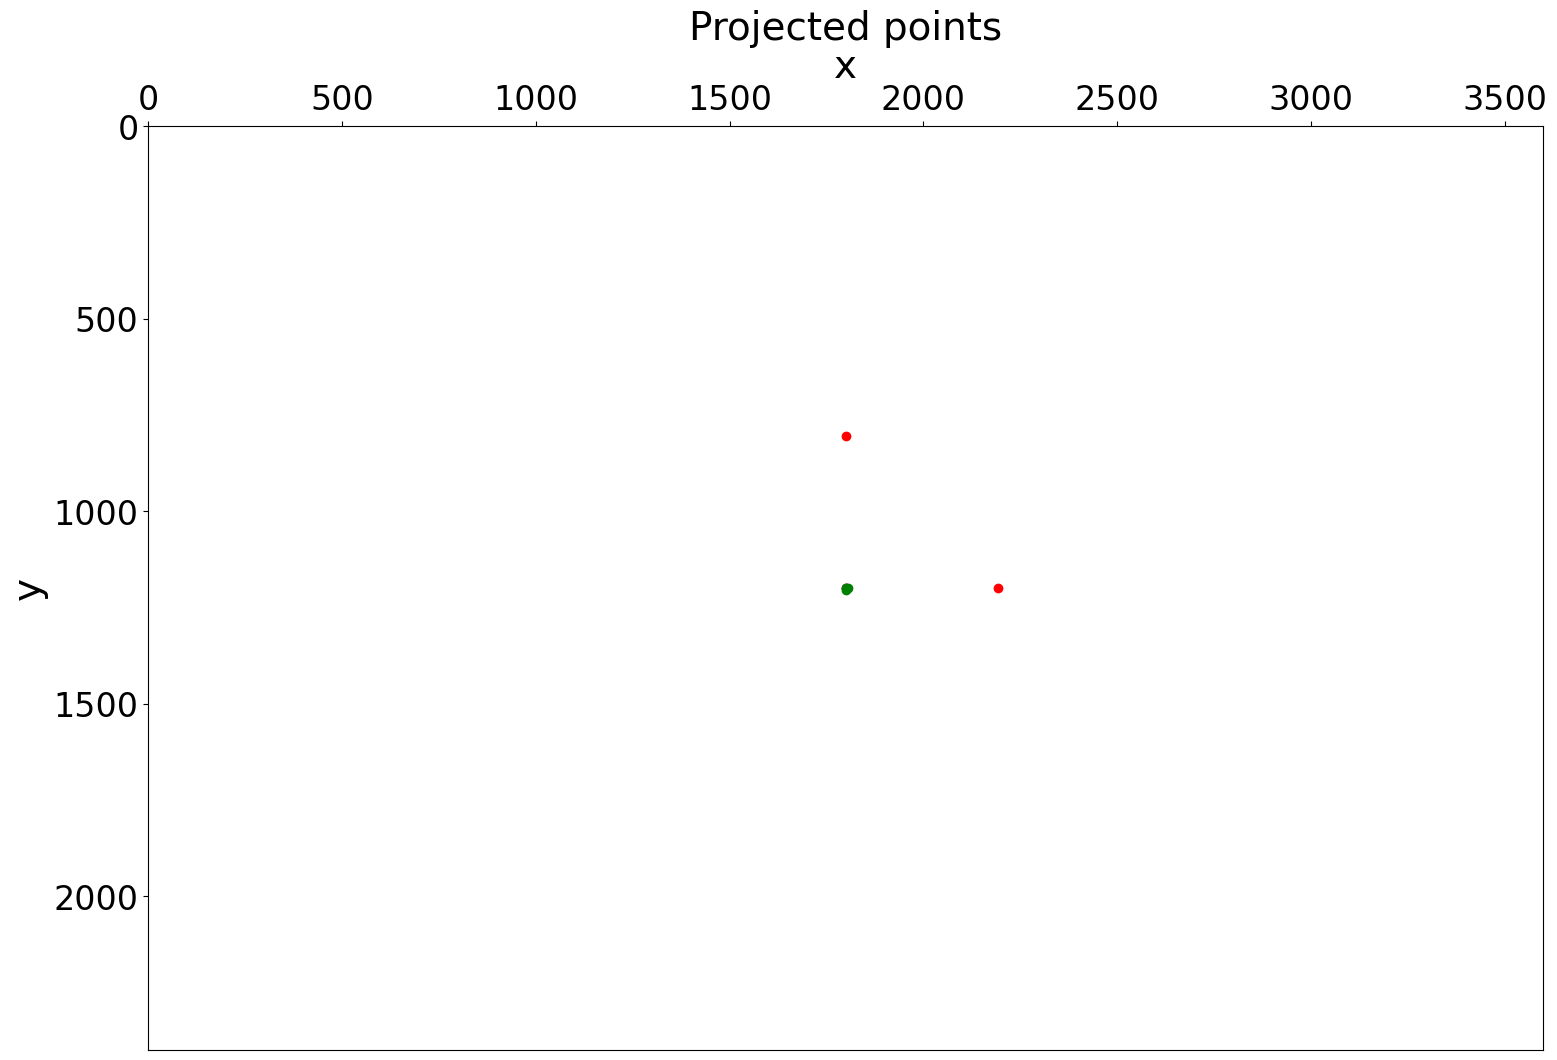

In [15]:
figsize = (image_bounds[0]/200, image_bounds[1]/200)
_, ax = plt.subplots(figsize=figsize)
fontsize = 28
ticks_fontsize = 24

#center point
ax.plot(center_point.image_coordinate[0], center_point.image_coordinate[1], 'o')

#rotation
rotation_x = np.array([point.image_coordinate[0] for point in rotation_points])
rotation_y = np.array([point.image_coordinate[1] for point in rotation_points])
ax.plot(rotation_x, rotation_y, 'o', color = 'red')

#translation
translation_x = np.array([point.image_coordinate[0] for point in translation_points])
translation_y = np.array([point.image_coordinate[1] for point in translation_points])
ax.plot(translation_x, translation_y, 'o', color = 'green')

ax.set_xlim([0,image_bounds[0]])
ax.set_ylim([image_bounds[1],0])
ax.set_ylabel('y', fontsize = fontsize)
ax.xaxis.tick_top()
ax.set_xlabel('x', fontsize = fontsize)    
ax.xaxis.set_label_position('top') 
ax.tick_params(labelsize=ticks_fontsize)
ax.set_title(f'Projected points', fontsize=fontsize)
plt.show()